In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
"""
Unsupervised Learning is a type of machine learning where:

The model is trained on unlabeled data i.e only input features (x) no y is provided.

It tries to find hidden patterns, structures, or distributions in the input data.

The output is not explicitly provided, unlike supervised learning.

Major typesd of unsupervide learning: 1.Clustering 

                                      {
                                          Clustering is an unsupervised machine learning 
                                          technique used to group similar data points together
                                          based on intrinsic patterns or similarities in the 
                                          data, without the use of labeled outcomes. It is 
                                          one of the core tasks in exploratory data mining,
                                          where the goal is to uncover natural groupings in datasets.
                                          
                                          Clustering aims to divide a set of data points into K groups (clusters) such that:

                                                Intra-cluster similarity is high (points in the same cluster are similar)
                                                Inter-cluster similarity is low (points in different clusters are dissimilar)

                                          Types of clustering: 1.Partition-based Clustering: Divides the data into K clusters 
                                                                                            based on minimizing intra-cluster 
                                                                                            variance (or distance). Centroid
                                                                                            represents the mean of points in 
                                                                                            the cluster.Example: K-Means
                                                                2.Hierarchical Clustering: Types: Agglomerative (bottom-up): Start with individual points, merge closest pair iteratively
                                                                                                  Divisive (top-down): Start with one big cluster, split recursively
                                                                                            Example: AGNES and DIANA
                                                                3.Density-based Clustering: Forms clusters based on dense regions of points separated by low-density areas.Example DBSCAN
                                      }
                                      2. Association rule analysis: Association Rule Mining (ARM)
                                                                    is a fundamental concept in 
                                                                    unsupervised learning and data mining, 
                                                                    primarily used to discover interesting relationships,
                                                                    patterns, or correlations among a set of items in large datasets.
                                                                    
                                                                    Terminologies: 1.Itemset: A collection of one or more items.
                                                                                              E.g {milk,bread,butter,milk,fruits,butter} is a 6-itemset
                                                                                   2.Suppport: Frequency (proportion) of transactions that contain an itemset.
                                                                                               support(milk)=number of milk in set/total item number=2/6
                                                                                   3.Confidence:likeligood of b happening when a has happend
                                                                                                lets say these are itemsets {milk,butter} {milk,bread},{bread,butter}
                                                                                                
                                                                                                conf(milk->butter)=a nad b both occuring/support of a
                                                                                                          = 1/(2/3)  supoort of milk is 2/3 becuse milk is in 2 out of 3 transaction
                                                                                                          
                                                                                                conf(butter->milk)=1/support of butter
                                                                                                                  =1/(2/3)  #these two can be differenct
                                                                                    4.lift :Measures how much more likely B 
                                                                                            has happened when A has happened, 
                                                                                            compared to B happening independently.
                                                                                            lift(milk->butter)= conf(milk->butter)/support(butter)
                                                                                                              =3/2 * (2/3)
                                         Eg. Apriori,Fp growth tree

"""

"""
🔵 What is a Cluster?
A cluster is a collection of data points grouped together because of similarity or proximity based on some defined distance metric (e.g., Euclidean). 
The goal of clustering is to discover natural groupings in the data.

1. Cluster Centroid:The central point of a cluster (mean of all the data points in that cluster).
(80,85),(82,88),(78,84),
then centroid = mean = (80,85.67) 

2.Inter cluster distance: Inter-cluster distance measures how far apart two clusters are. It’s used to evaluate the separation between clusters.

Types of distance measurements:
| Type                  | Definition                                                             | Used in       |
| --------------------- | ---------------------------------------------------------------------- | ------------- |
| **Single Linkage**    | Minimum distance between any two points (one from each cluster)        | Hierarchical  |
| **Complete Linkage**  | Maximum distance between any two points (one from each cluster)        | Hierarchical  |
| **Average Linkage**   | Average of all pairwise distances between the clusters                 | Hierarchical  |
| **Centroid Distance** | Euclidean distance between the centroids of two clusters               | K-Means, etc. |
| **Ward’s Distance**   | Increase in total within-cluster variance when two clusters are merged | Ward's method |

3.ilhouette Score: Measures how similar a point is to its own cluster (cohesion) vs other clusters (separation).

s=b-a/max(a,b) a: average intra-cluster distance b: average nearest-cluster distance

4.Similarity and disssimilarity measurement technics: euclidian distance, mahatten distance and cosine similarity 

cosine similarity=A.B/||A|| ||B||
A>B is dot product size of a = sum(root(Ai^2))

# Vectors
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])

# ----------------------------------------------------------
# Step 1: Dot Product
# A · B = (1*4) + (2*5) + (3*6) = 4 + 10 + 18 = 32
# ----------------------------------------------------------
dot_product = np.dot(A, B)

# ----------------------------------------------------------
# Step 2: Magnitude (Euclidean norm)
# ||A|| = sqrt(1^2 + 2^2 + 3^2) = sqrt(14)
# ||B|| = sqrt(4^2 + 5^2 + 6^2) = sqrt(77)
# ----------------------------------------------------------
magnitude_A = np.linalg.norm(A)  # sqrt(1^2 + 2^2 + 3^2) = sqrt(14)
magnitude_B = np.linalg.norm(B)  # sqrt(4^2 + 5^2 + 6^2) = sqrt(77)

# ----------------------------------------------------------
# Step 3: Cosine Similarity
# cosine(θ) = (A · B) / (||A|| * ||B||)
#            = 32 / (sqrt(14) * sqrt(77)) ≈ 0.9746
# ----------------------------------------------------------
cosine_similarity = dot_product / (magnitude_A * magnitude_B)


5.Types of clustering

| Type            | Meaning                                                   | Example                       |
| --------------- | --------------------------------------------------------- | ----------------------------- |
| Hard Clustering | Each point belongs to exactly one cluster                 | K-Means                       |
| Soft Clustering | Each point has a probability of belonging to each cluster | Gaussian Mixture Models (GMM) |

"""

[[ 1.   2. ]
 [ 1.5  1.8]
 [ 5.   8. ]
 [ 8.   8. ]
 [ 1.   0.6]
 [ 9.  11. ]
 [ 8.   2. ]
 [10.   2. ]
 [ 9.   3. ]]


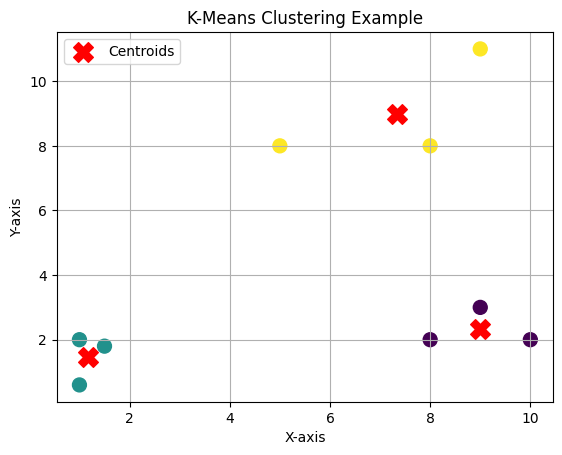

In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample data dictionary
data = {
    "points": [
        [1.0, 2.0],
        [1.5, 1.8],
        [5.0, 8.0],
        [8.0, 8.0],
        [1.0, 0.6],
        [9.0, 11.0],
        [8.0, 2.0],
        [10.0, 2.0],
        [9.0, 3.0]
    ]
}

# Convert to DataFrame properly
df = pd.DataFrame(data["points"], columns=["x", "y"])

# Convert to numpy array (important!)
X = df.values  # or df[["x", "y"]].values
print(X)
# Fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Predict clusters
y_kmeans = kmeans.predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering Example")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
data={'x':[1,3,4,5,6,7,8,9],
      'y':[2,1,8,8,0,1,11,7]}

df=pd.DataFrame(data)

from sklearn.cluster import KMeans

model=KMeans(n_clusters=3)

model.fit(df)

model.predict(pd.DataFrame({'x':[1],'y':[16]}))

array([0])

In [ ]:
"""
Hierarchical Clustering

Definition:
Hierarchical clustering is an unsupervised clustering algorithm that builds a hierarchy of clusters.
There are two types of strategies:
1. Agglomerative (bottom-up) — AGNES
2. Divisive (top-down)     — DIANA

Output is usually a dendrogram: a tree-like diagram that records the sequences of merges or splits.

---

AGNES (Agglomerative Nesting)

Steps:
1. Treat each data point as a singleton cluster (each point is its own cluster).
2. Compute a proximity matrix (usually Euclidean distance).
3. Find the two closest clusters and merge them.
4. Update the proximity matrix after merging.
5. Repeat steps 3–4 until all points are merged into one cluster (root of the hierarchy).

AGNES uses a **linkage criteria**:
- Single Linkage: min distance between points of two clusters.
- Complete Linkage: max distance between points.
- Average Linkage: average distance.
- Ward's Method: minimize variance.

---

DIANA (Divisive Analysis)

Steps:
1. Start with all points in a single large cluster.
2. Find the cluster with the highest dissimilarity.
3. Split this cluster into two based on max dissimilarity.
4. Repeat step 2–3 recursively until each point becomes its own cluster.

NOTE: DIANA is less commonly implemented in libraries like sklearn, and is more theoretical or supported via `R`.

"""

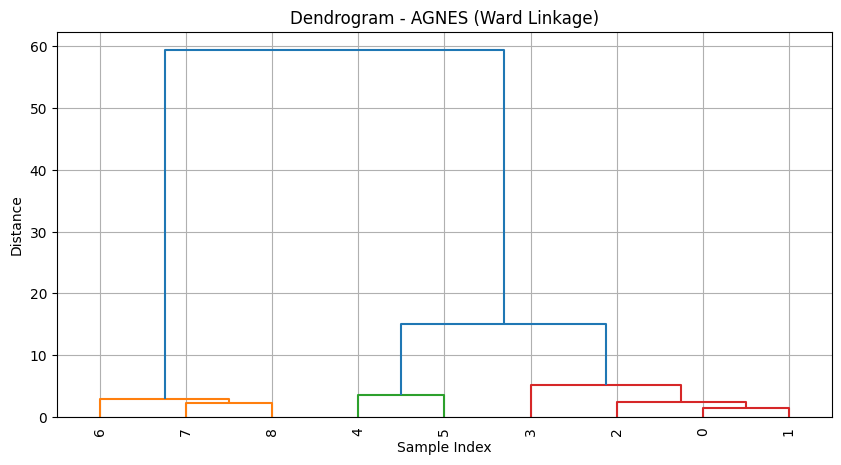

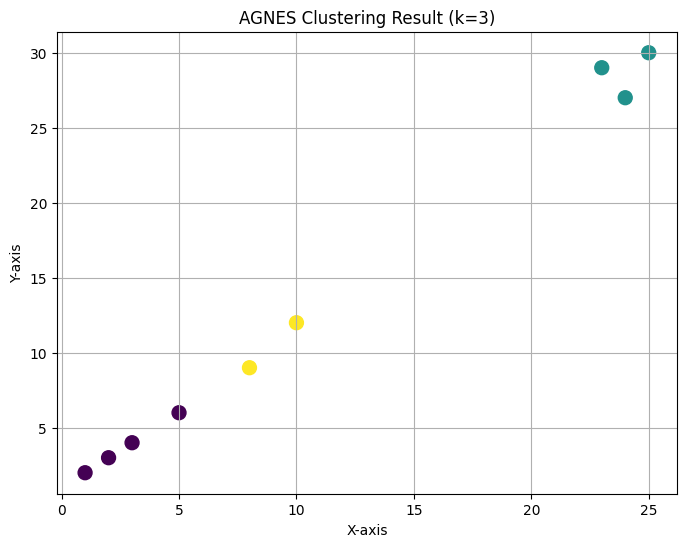

Cluster Labels: [0 0 0 0 2 2 1 1 1]


In [14]:
"""
AGNES (Agglomerative Clustering) on Custom Dataset

Steps:
1. Define a dataset in a dictionary.
2. Convert it to a NumPy array.
3. Use `scipy` to compute linkage matrix and plot dendrogram.
4. Use sklearn to perform AGNES clustering and visualize clusters.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Step 1: Custom dataset in dictionary form
data = {
    "points": [
        [1, 2],
        [2, 3],
        [3, 4],
        [5, 6],
        [8, 9],
        [10, 12],
        [25, 30],
        [24, 27],
        [23, 29]
    ]
}

# Step 2: Convert to NumPy array
X = np.array(data["points"])

# Step 3: Compute linkage matrix using Ward's method (for dendrogram)
Z = linkage(X, method='ward')

# Step 4: Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z,
           leaf_rotation=90,
           leaf_font_size=10,
           color_threshold=15
           )
plt.title("Dendrogram - AGNES (Ward Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

# Step 5: Perform AGNES clustering (set number of clusters = 3)
agnes_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = agnes_model.fit_predict(X)

# Step 6: Plot clustered points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=100)
plt.title("AGNES Clustering Result (k=3)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()

# Step 7: Print cluster labels
print("Cluster Labels:", labels)


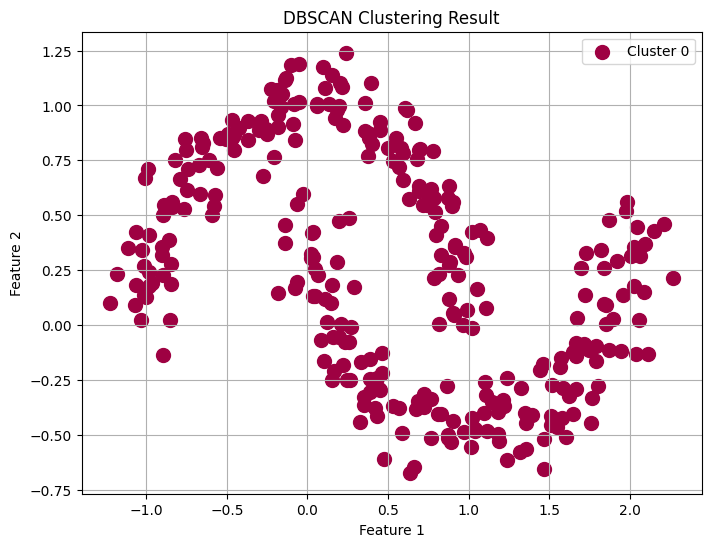

Cluster Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [15]:
"""
DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

-------------------------------
What is Density-Based Clustering?
-------------------------------
- Clusters are formed in dense regions of the feature space.
- Sparse regions are treated as boundaries or noise.
- No need to specify number of clusters (unlike k-means).
- Can identify arbitrarily shaped clusters (like spirals or moons).

-------------------------------
DBSCAN Terminologies:
-------------------------------
1. eps (ε): Radius around a point to search for neighbors.
2. min_samples: Minimum number of neighbors (including self) to qualify as a core point.
3. Core Point: Has >= min_samples points in its ε-neighborhood.
4. Border Point: Has < min_samples points in its ε-neighborhood but is in the neighborhood of a core point.
5. Noise Point: Neither a core point nor a border point.
6. Directly Density-Reachable: A point `p` is directly reachable from core point `q` if it lies in `q`'s ε-neighborhood.
7. Density-Reachable: There exists a chain of directly reachable points from a core point to a point.

-------------------------------
DBSCAN Steps:
-------------------------------
1. For each point, find all points in its ε-neighborhood.
2. If neighbors ≥ min_samples → mark as core point.
3. Group core points and their reachable border points into clusters.
4. Label any point not reachable from a core point as noise.

-------------------------------
Python Implementation
-------------------------------
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Step 1: Create synthetic dataset with noise and non-linear shape
# make_moons generates two interleaved half circles
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Step 2: Perform DBSCAN clustering
# eps: distance to consider for neighborhood (radius)
# min_samples: minimum number of neighbors to form a dense region
db = DBSCAN(eps=0.3, min_samples=5)

# Step 3: Fit the model and get predicted cluster labels
labels = db.fit_predict(X)

# Step 4: Visualize the result
# DBSCAN assigns -1 to noise points
unique_labels = set(labels)

plt.figure(figsize=(8, 6))

# Loop through each unique label and plot
for label in unique_labels:
    if label == -1:
        # Noise points in black
        color = 'black'
        label_name = 'Noise'
    else:
        # Normal clusters
        color = plt.cm.Spectral(float(label) / len(unique_labels))
        label_name = f'Cluster {label}'
    
    # Boolean mask to get points for current label
    mask = (labels == label)
    plt.scatter(X[mask, 0], X[mask, 1], s=100, c=[color], label=label_name)

plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.legend()
plt.show()

# Step 5: Print cluster labels
print("Cluster Labels:", labels)


In [ ]:
#Apriori Alogrithm

"""
Market Basket Analysis (MBA) is a data mining technique used by retailers to discover patterns in customer purchase behavior. It identifies combinations of products that frequently co-occur in transactions.

Think of it like: “If a customer buys bread, how likely are they to also buy butter or jam in the same basket?”


"""
data = [
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Butter'],
    ['Milk', 'Bread'],
    ['Milk', 'Butter'],
    ['Bread'],
    ['Milk', 'Bread', 'Butter', 'Eggs'],
    ['Bread', 'Eggs'],
    ['Milk', 'Eggs'],
    ['Milk', 'Bread', 'Eggs'],
    ['Butter', 'Eggs']
]


